In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


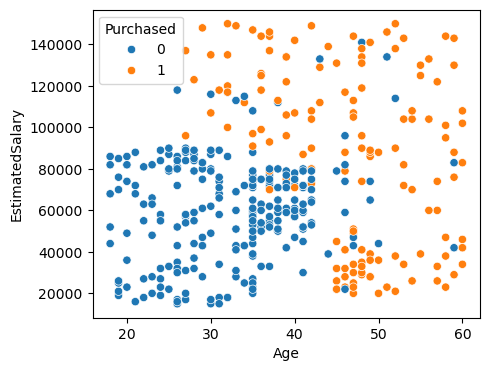

In [120]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Age", y="EstimatedSalary", data=data, hue="Purchased")
plt.show()

In [121]:
x = data.iloc[:,:-1]
y = data["Purchased"]

In [122]:
# Data Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head(3)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290


In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [124]:
# Model Train
from sklearn.tree import DecisionTreeClassifier

In [125]:
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)*100 , dc.score(x_train,y_train)*100 # Overfitted Model.

(83.75, 99.6875)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


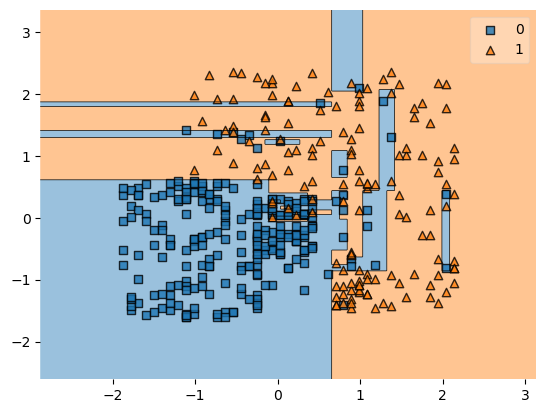

In [126]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dc)
plt.show()

In [127]:
dc.predict([[-1.781797,-1.490046],[-0.540127,2.356750],[-0.253587,-1.460681],[19,76000],[-1.781797,0.183751]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 0], dtype=int64)

In [128]:
dc.predict(x_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [129]:
y_test.head(4)

209    0
280    1
33     0
210    1
Name: Purchased, dtype: int64

In [130]:
# Show Graph
from sklearn.tree import plot_tree

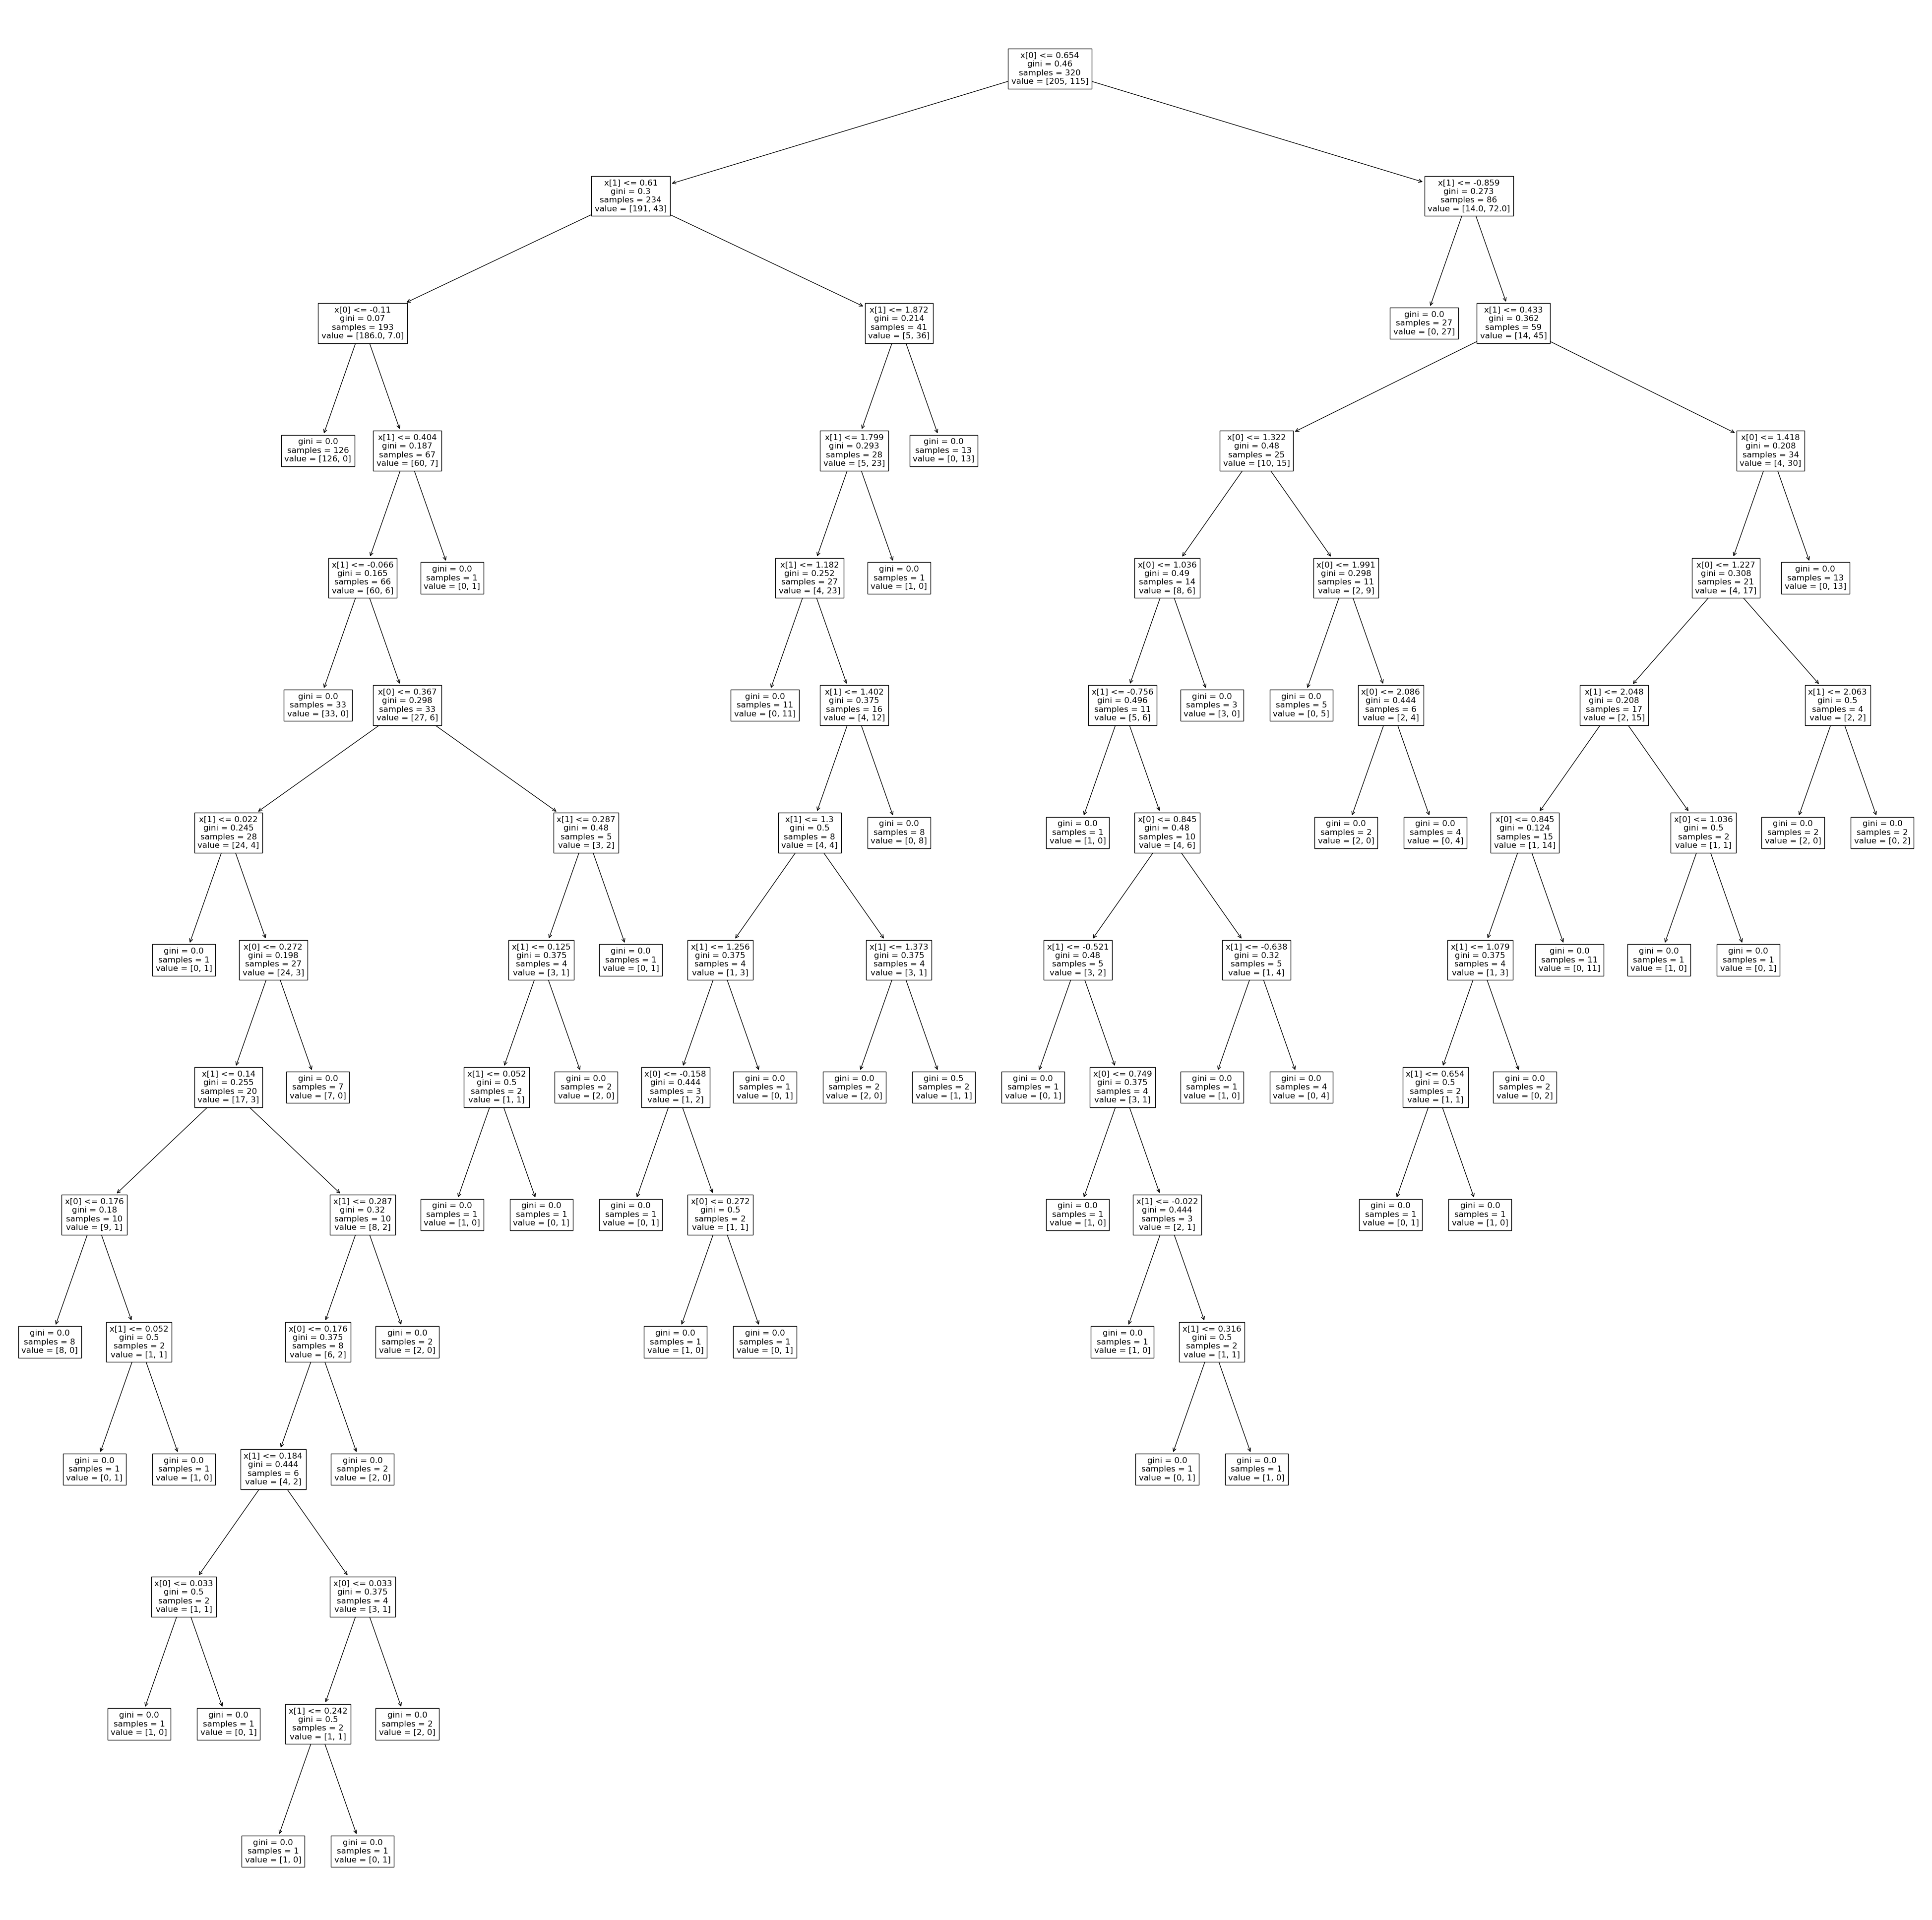

In [131]:
plt.figure(figsize=(50,50))
plot_tree(dc)
plt.show()

# Pre Pruning 

In [132]:
dc1 = DecisionTreeClassifier(max_depth=5)
dc1.fit(x_train,y_train)
dc1.score(x_test,y_test)*100 , dc1.score(x_train,y_train)*100 

(90.0, 93.4375)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


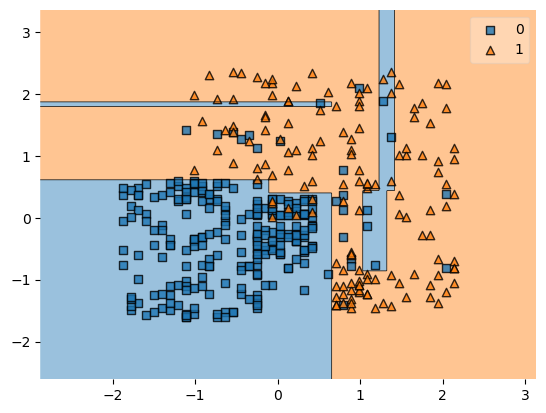

In [133]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dc1)
plt.show()

# Post Puring

In [134]:
for i in range(1,20):
    dc2 = DecisionTreeClassifier(max_depth=i)
    dc2.fit(x_train,y_train)
    print(dc2.score(x_test,y_test)*100 , dc2.score(x_train,y_train)*100 )

90.0 82.1875
91.25 91.875
91.25 91.875
91.25 93.125
90.0 93.4375
86.25 95.0
85.0 96.875
85.0 97.1875
85.0 98.125
85.0 98.4375
83.75 99.0625
83.75 99.375
83.75 99.375
83.75 99.6875
83.75 99.6875
83.75 99.6875
83.75 99.6875
83.75 99.6875
83.75 99.6875


In [135]:
dc1 = DecisionTreeClassifier(max_depth=3)
dc1.fit(x_train,y_train)
dc1.score(x_test,y_test)*100 , dc1.score(x_train,y_train)*100  # Best fitted model

(91.25, 91.875)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


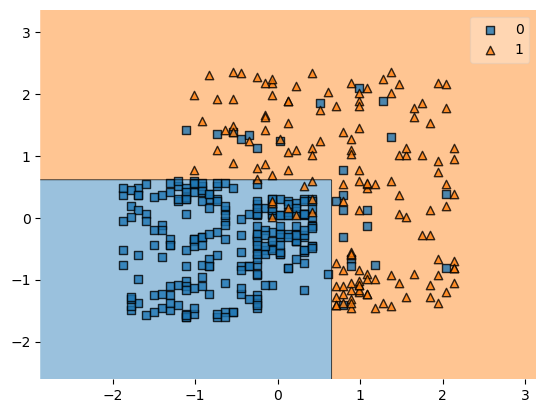

In [136]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dc1)
plt.show()

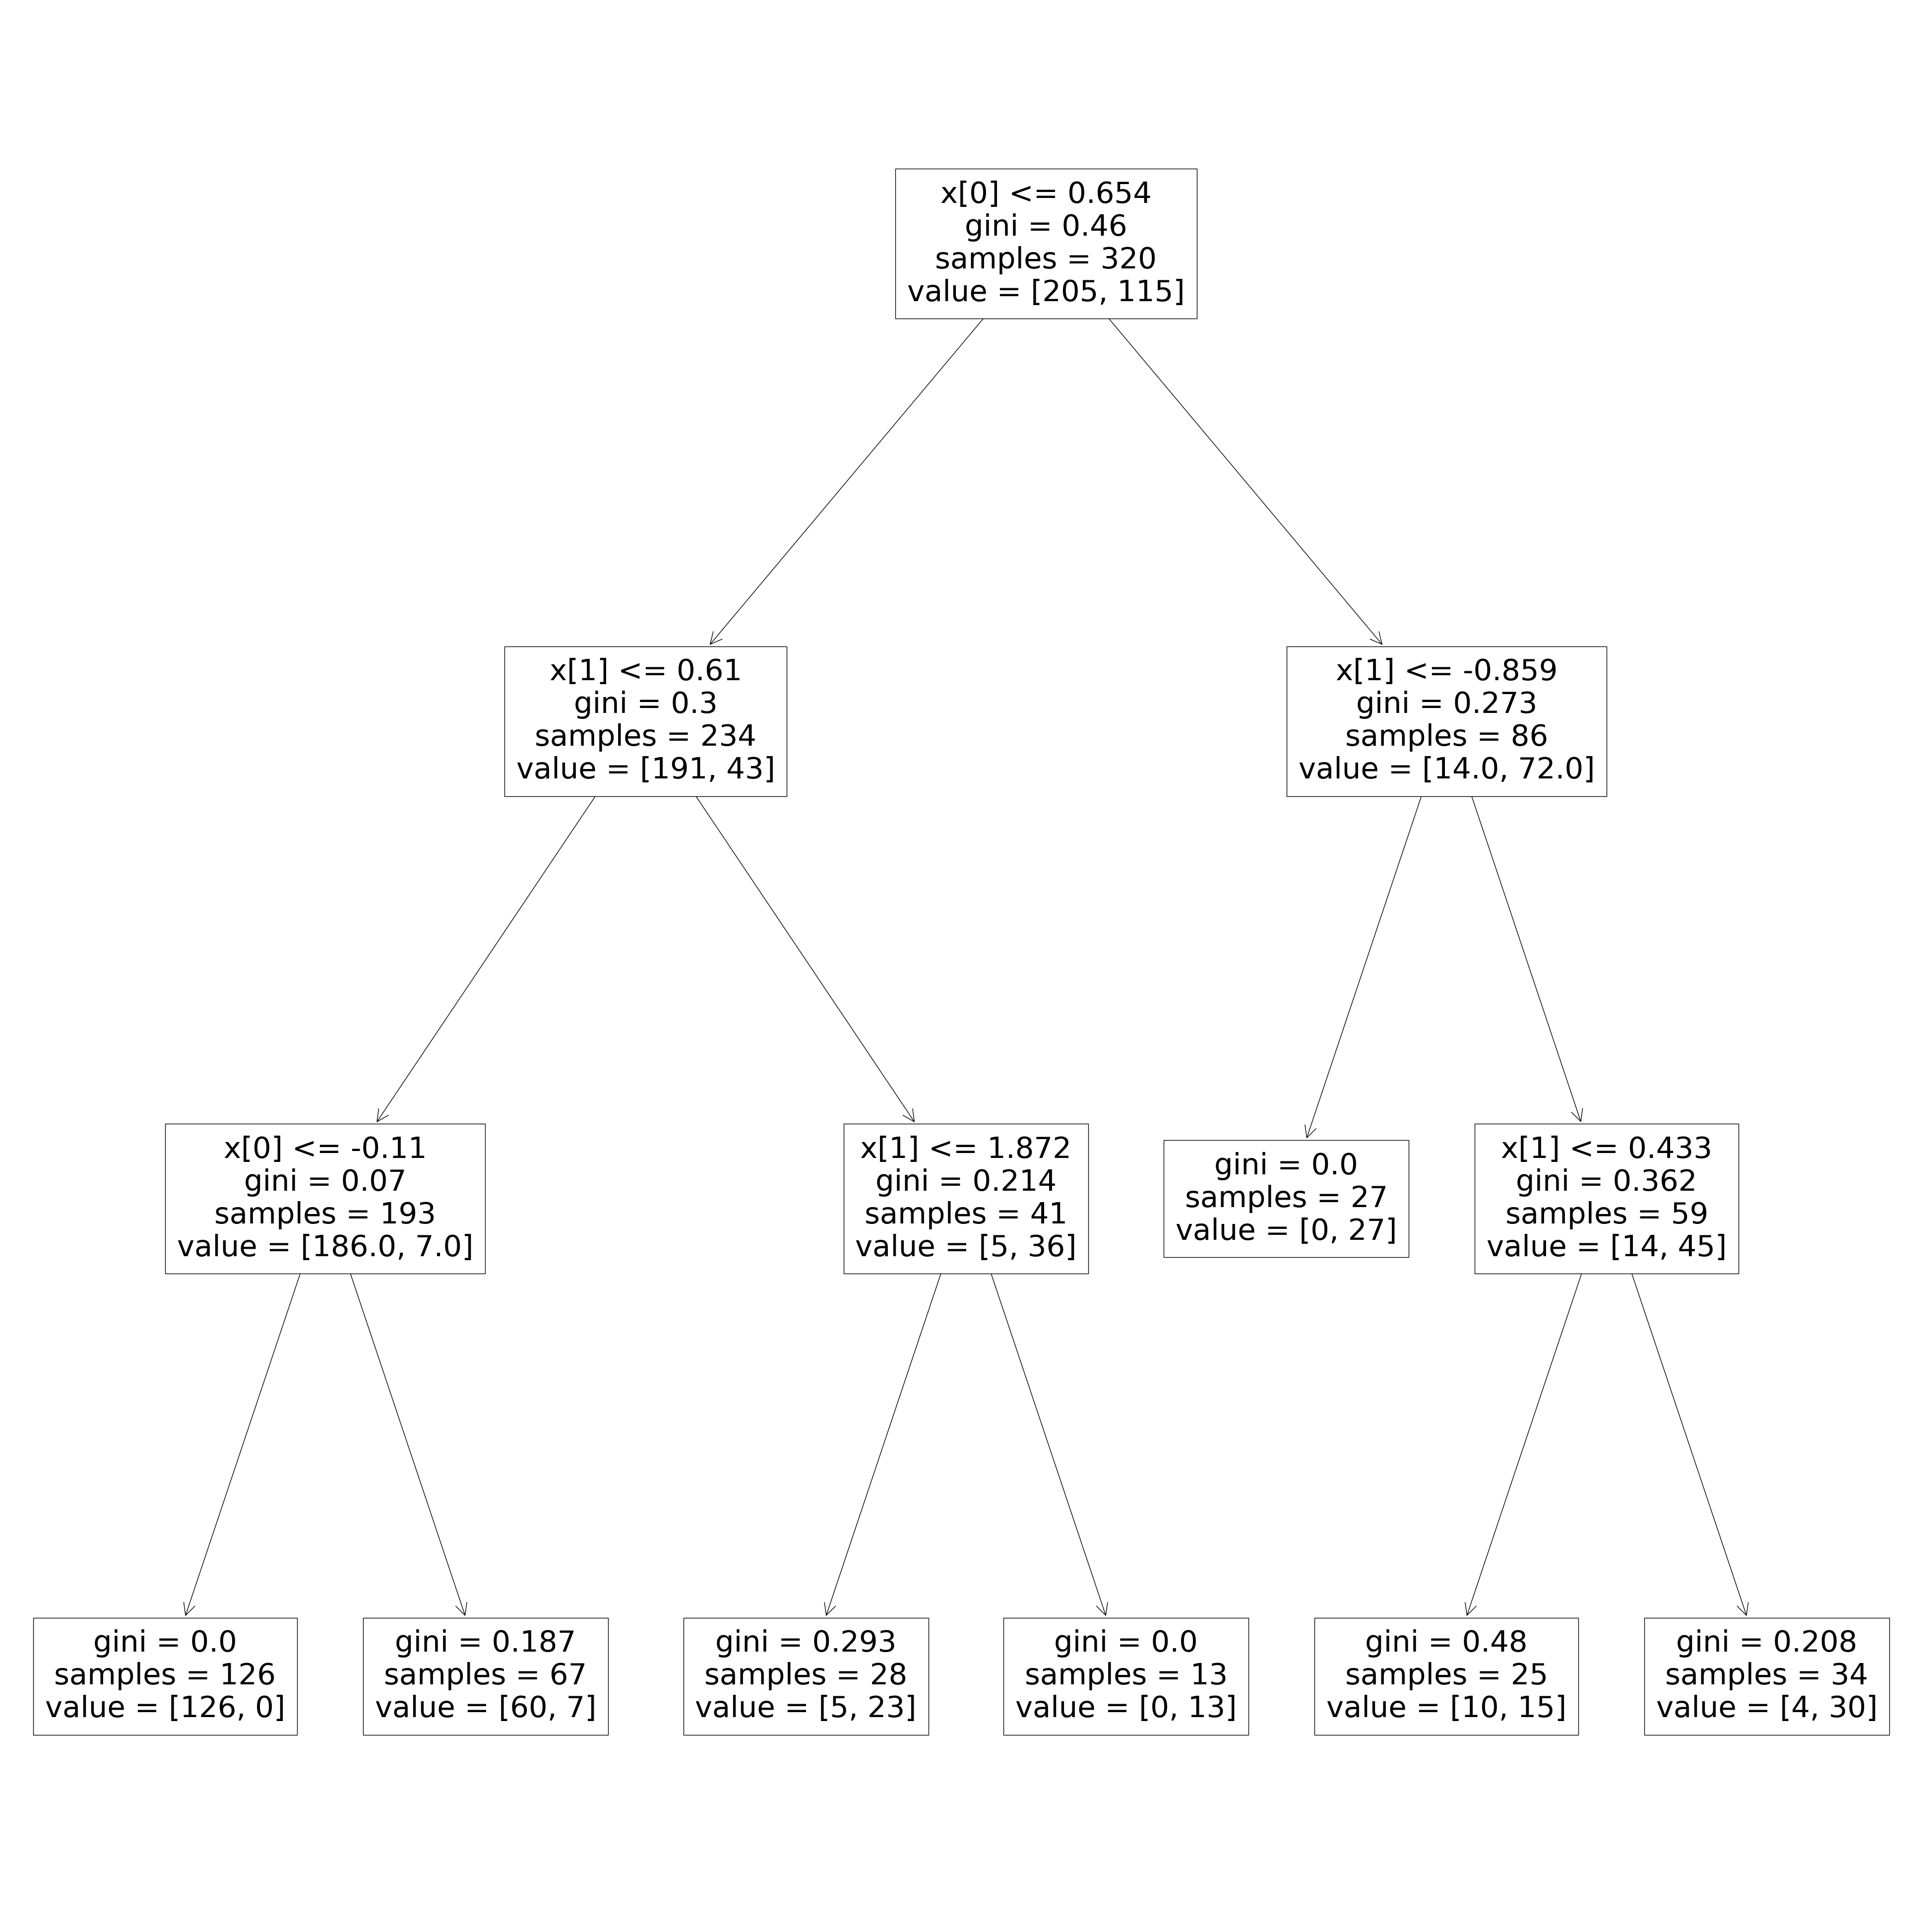

In [137]:
plt.figure(figsize=(50,50))
plot_tree(dc1)
plt.show()